# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
import gmaps
import json
import requests
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt

## Generate Cities List

In [2]:
#Set ranges from which to extract random latitudes and longitudes
lat_rng = [-90, 90]
lng_rng = [-180, 180]

cities = []

lat = np.random.uniform(-90, 90, 1500)
lng = np.random.uniform(-180, 180, 1500)
coordinates = list(zip(lat, lng))

for coord in coordinates:
    (lat, lng) = coord
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)
cities

['kapaa',
 'sao filipe',
 'ubeda',
 'albany',
 'acari',
 'torbay',
 'sault sainte marie',
 'simbahan',
 'punta arenas',
 'paucartambo',
 'kavieng',
 'dikson',
 'attawapiskat',
 'hilo',
 'llanes',
 'busselton',
 'nikolskoye',
 'mataura',
 'barrow',
 'atuona',
 'vostok',
 'new norfolk',
 'sohag',
 'rikitea',
 'sambalpur',
 'wahran',
 'butaritari',
 'la ronge',
 'moundsville',
 'borogontsy',
 'saint-philippe',
 'komsomolskiy',
 'ponta do sol',
 'salinopolis',
 'berbera',
 'babanusah',
 'belyy yar',
 'marcona',
 'mys shmidta',
 'fortuna',
 'sibut',
 'port elizabeth',
 'hasaki',
 'hithadhoo',
 'arlit',
 'chara',
 'ushuaia',
 'upernavik',
 'illoqqortoormiut',
 'vaini',
 'kirakira',
 'tsihombe',
 'necochea',
 'dzhusaly',
 'taguatinga',
 'puerto ayora',
 'port alfred',
 'taolanaro',
 'udachnyy',
 'georgetown',
 'dunedin',
 'mount isa',
 'chokurdakh',
 'atar',
 'ancud',
 'iracoubo',
 'ongandjera',
 'ixtapa',
 'bereda',
 'sakakah',
 'lebu',
 'warqla',
 'hamilton',
 'norman wells',
 'guanica',
 '

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,kapaa
1,sao filipe
2,ubeda
3,albany
4,acari


In [4]:
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,,,,,,,,
1,sao filipe,,,,,,,,
2,ubeda,,,,,,,,
3,albany,,,,,,,,
4,acari,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
print("Beginning Data Retrieval")
print("___________________")

url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + "appid=" + api_key + "&q="

for index, row in cities_df.iterrows():
    city = row["city"]
    response = requests.get(query_url + city).json()
    print(f"Processing record for city number {index}: {city}")
    
    try:      
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        
        #print(f"Processing Record {index} | {city}")
        
    except (KeyError, IndexError):
        print("City not found... Continue search.")

Beginning Data Retrieval
___________________
Processing record for city number 0: kapaa
Processing record for city number 1: sao filipe
Processing record for city number 2: ubeda
Processing record for city number 3: albany
Processing record for city number 4: acari
Processing record for city number 5: torbay
Processing record for city number 6: sault sainte marie
Processing record for city number 7: simbahan
Processing record for city number 8: punta arenas
Processing record for city number 9: paucartambo
City not found... Continue search.
Processing record for city number 10: kavieng
Processing record for city number 11: dikson
Processing record for city number 12: attawapiskat
City not found... Continue search.
Processing record for city number 13: hilo
Processing record for city number 14: llanes
Processing record for city number 15: busselton
Processing record for city number 16: nikolskoye
Processing record for city number 17: mataura
Processing record for city number 18: barrow
P

Processing record for city number 161: zheleznodorozhnyy
Processing record for city number 162: taoudenni
Processing record for city number 163: bucerias
Processing record for city number 164: caceres
Processing record for city number 165: chingirlau
Processing record for city number 166: talnakh
Processing record for city number 167: naze
Processing record for city number 168: constitucion
Processing record for city number 169: namtsy
Processing record for city number 170: miraflores
Processing record for city number 171: victoria
Processing record for city number 172: lorengau
Processing record for city number 173: jamestown
Processing record for city number 174: hermanus
Processing record for city number 175: biograd na moru
Processing record for city number 176: cururupu
Processing record for city number 177: saint-georges
Processing record for city number 178: basar
Processing record for city number 179: port macquarie
Processing record for city number 180: yulara
Processing recor

Processing record for city number 325: biak
Processing record for city number 326: morant bay
Processing record for city number 327: bhor
Processing record for city number 328: amahai
Processing record for city number 329: sisimiut
Processing record for city number 330: baringo
Processing record for city number 331: marica
Processing record for city number 332: orje
Processing record for city number 333: ambilobe
Processing record for city number 334: kefalovrison
City not found... Continue search.
Processing record for city number 335: warmbad
Processing record for city number 336: sola
Processing record for city number 337: awbari
Processing record for city number 338: asandh
Processing record for city number 339: dingle
Processing record for city number 340: progreso
Processing record for city number 341: araxa
Processing record for city number 342: champerico
Processing record for city number 343: chokwe
Processing record for city number 344: tual
Processing record for city number 

Processing record for city number 488: menongue
Processing record for city number 489: griffith
Processing record for city number 490: sentyabrskiy
City not found... Continue search.
Processing record for city number 491: yerbogachen
Processing record for city number 492: yarim
Processing record for city number 493: khor
Processing record for city number 494: roma
Processing record for city number 495: bodden town
Processing record for city number 496: rawson
Processing record for city number 497: taltal
Processing record for city number 498: husavik
Processing record for city number 499: manaure
Processing record for city number 500: goose creek
Processing record for city number 501: albion
Processing record for city number 502: nimbahera
Processing record for city number 503: beringovskiy
Processing record for city number 504: liepaja
Processing record for city number 505: victor harbor
Processing record for city number 506: barcelos
Processing record for city number 507: andevoranto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cities_csv = cities_df.to_csv(r"cities.csv")
cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Lat,Lng
0,kapaa,,,298.33,84,75,0.45,US,1626967293,22.0752,-159.3190
1,sao filipe,,,297.61,86,31,3.71,CV,1626967293,14.8961,-24.4956
2,ubeda,,,310.01,9,0,5.41,ES,1626967294,38.0133,-3.3705
3,albany,,,297.92,64,95,0.89,US,1626967294,42.6001,-73.9662
4,acari,,,294.3,62,55,2.43,PE,1626967294,-15.4311,-74.6158
...,...,...,...,...,...,...,...,...,...,...,...
605,asahi,,,300.48,85,93,2.27,JP,1626967446,35.7167,140.6500
606,mrirt,,,,,,,,,NaN,NaN
607,kudahuvadhoo,,,301.13,74,96,5.13,MV,1626967274,2.6708,72.8944
608,sisophon,,,298.25,86,100,3.45,KH,1626967447,13.5859,102.9737


In [55]:
cities_df["Latitude"] = pd.to_numeric(cities_df.Humidity, errors='coerce')
cities_df["Longitude"] = pd.to_numeric(cities_df.Humidity, errors='coerce')
cities_df["Humidity"] = pd.to_numeric(cities_df.Humidity, errors='coerce')
cities_df["Max Temp"] = pd.to_numeric(cities_df.Humidity, errors='coerce')
cities_df["Cloudiness"] = pd.to_numeric(cities_df.Humidity, errors='coerce')
cities_df["Wind Speed"] = pd.to_numeric(cities_df.Humidity, errors='coerce')
cities_df.dtypes

city           object
Latitude      float64
Longitude     float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
Lat           float64
Lng           float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
sub_cities_df = cities_df.loc[cities_df['Humidity'] >= 100]
sub_cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Lat,Lng
80,alofi,-19.0595,-169.919,293.09,100.0,3,0.51,NU,1626968506,-19.0595,-169.9187
92,avarua,-21.2078,-159.775,293.18,100.0,17,0.51,CK,1626968509,-21.2078,-159.7750
155,tuktoyaktuk,69.4541,-133.037,283.15,100.0,90,6.69,CA,1626968526,69.4541,-133.0374
402,grindavik,63.8424,-22.4338,286.79,100.0,90,8.75,IS,1626968590,63.8424,-22.4338


In [38]:
#  Get the indices of cities that have humidity over 100% and store them in a variable
over100 = sub_cities_df.index
over100

Int64Index([80, 92, 155, 402], dtype='int64')

In [50]:
#Drop cities with humidity over 100
clean_df = cities_df.drop(labels=over100)

In [48]:
#clean data to remove cities that have missing data & reset index
clean_cities_df = clean_df.dropna().reset_index(drop=True)
clean_cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Lat,Lng
0,kapaa,22.0752,-159.319,298.33,84.0,75,1.79,US,1626968356,22.0752,-159.3190
1,sao filipe,14.8961,-24.4956,297.68,86.0,41,4.35,CV,1626968486,14.8961,-24.4956
2,ubeda,38.0133,-3.3705,310.57,9.0,0,6.22,ES,1626968486,38.0133,-3.3705
3,albany,42.6001,-73.9662,298.17,62.0,82,0.45,US,1626968333,42.6001,-73.9662
4,acari,-15.4311,-74.6158,295.48,58.0,54,2.83,PE,1626968487,-15.4311,-74.6158
...,...,...,...,...,...,...,...,...,...,...,...
559,baherden,38.4362,57.4316,308.49,12.0,0,3.3,TM,1626968644,38.4362,57.4316
560,asahi,35.7167,140.65,300.48,85.0,95,2.26,JP,1626968644,35.7167,140.6500
561,kudahuvadhoo,2.6708,72.8944,301.21,73.0,97,4.92,MV,1626968645,2.6708,72.8944
562,sisophon,13.5859,102.974,298.28,85.0,100,3.07,KH,1626968645,13.5859,102.9737


In [51]:
clean_cities_df.count()

city          564
Latitude      564
Longitude     564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
Lat           564
Lng           564
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

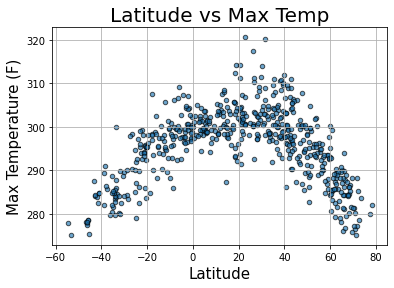

In [64]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "red", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Max Temp", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.show()

## Latitude vs. Humidity Plot

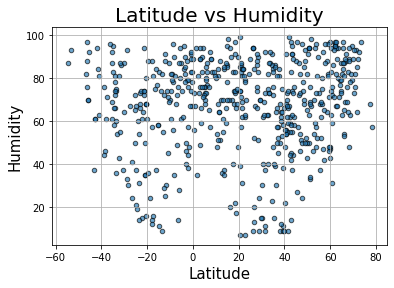

In [65]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Humidity', marker = "o", 
               facecolors = "red", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Humidity", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity", size = 15)
plt.show()

## Latitude vs. Cloudiness Plot

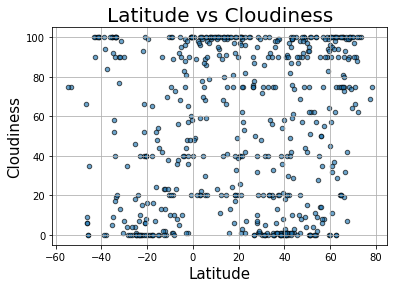

In [66]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Cloudiness', marker = "o", 
               facecolors = "red", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Cloudiness", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness", size = 15)
plt.show()

## Latitude vs. Wind Speed Plot

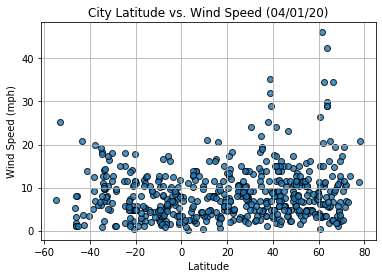

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


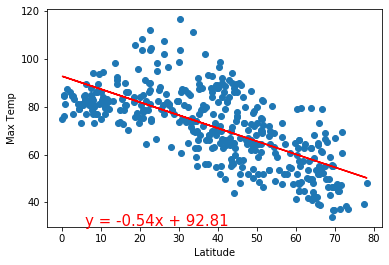

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


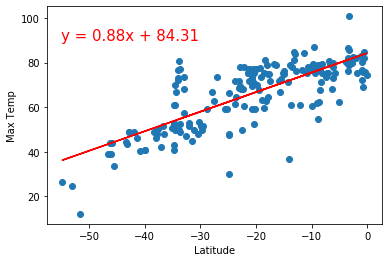

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


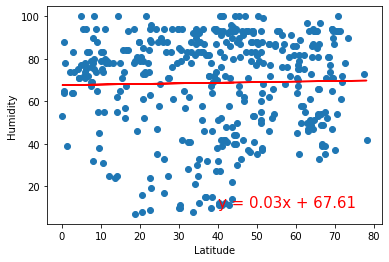

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


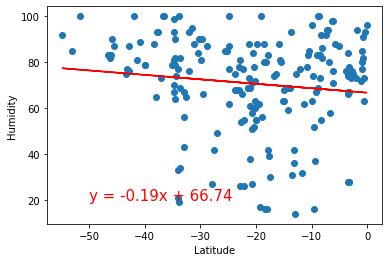

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


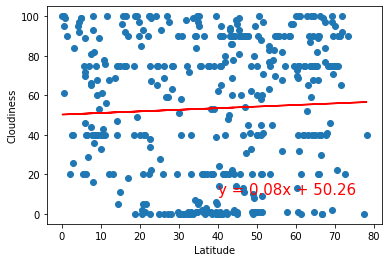

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


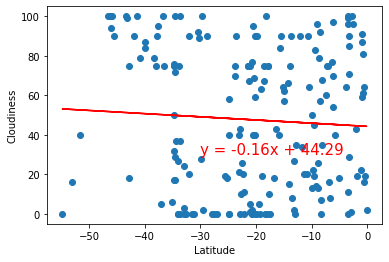

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


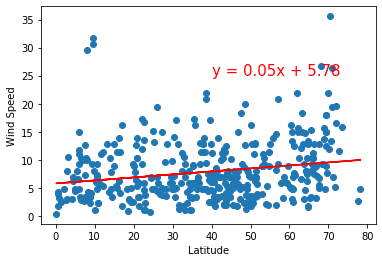

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


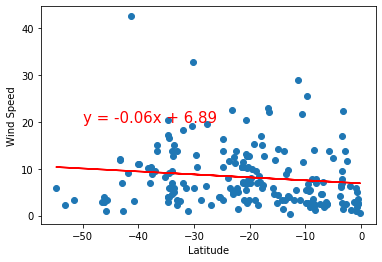